In [3]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')

In [19]:
perch_df = df.loc[df['Species'] == 'Perch']

perch_length = perch_df[['Length2']] # 2차원 데이터로 바꾸기
perch_weight = perch_df[['Weight']]
# perch_length

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
train_test_split(perch_length, perch_weight)

In [24]:
from sklearn.linear_model import LinearRegression # 선형회귀

lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [21]:
lr.coef_   # 기울기를 coefficient 또는 가중치 weight라고 부름

array([[38.02630507]])

In [25]:
lr.intercept_

array([-685.84588374])

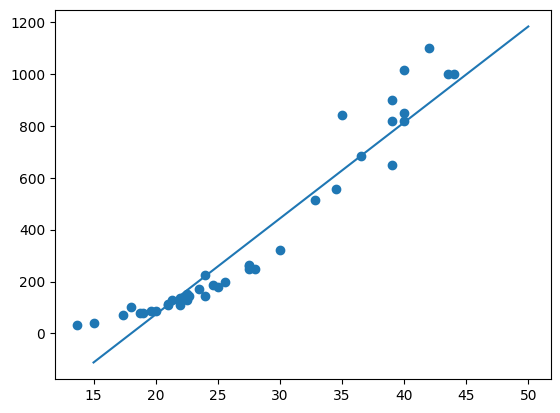

In [33]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * 37 - 667, 50 * 37 - 667]) # 선 그래프 x = 15, y = 50선이 기울기와 절편을 가질때

In [35]:
print(lr.score(train_input, train_target))
print(lr.socre(test_input, test_target))

0.9284215701635318


AttributeError: 'LinearRegression' object has no attribute 'socre'

In [37]:
lr.predict([[1]]) # 무게가 (-) 가 나오는 문제가 발생함 그래프로 그리면 

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-647.81957867]])

In [43]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
train_input

,Length2,Length2_poly
119,40.0,1600.00
123,42.0,1764.00
104,27.5,756.25
89,22.0,484.00
110,34.5,1190.25
106,28.0,784.00
127,44.0,1936.00
87,22.0,484.00
90,22.0,484.00
100,25.6,655.36


In [45]:
lr = LinearRegression() # 선형회귀
lr.fit(train_input, train_target)

LinearRegression()

In [47]:
lr.score(test_input, test_target)

0.9933948137801044

In [51]:
lr.predict([[5, 25]]) # 데이터가 두개가 돼서 두개를 5cm 와 제곱인 25cm를 넣어줘야 함
# 결과가 아까는 음수가 나왔는데 지금은 양수가 나옴

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[49.60158503]])

In [54]:
print(lr.coef_, lr.intercept_)

[[-22.72784042   1.02311938]] [137.66280267]
